In [5]:
import requests
import json
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
csvfile19 = "./Resources/2019.csv"
csv_df19 = pd.read_csv(csvfile19)
csv_df19["Year"] = "2019"
len(csv_df19)

620

In [12]:
csvfile18 = "./Resources/2018.csv"
csv_df18 = pd.read_csv(csvfile18)
csv_df18["Year"] = "2018"
len(csv_df18)

622

In [13]:
csvfile17 = "./Resources/2017.csv"
csv_df17 = pd.read_csv(csvfile17)
csv_df17["Year"] = "2017"
len(csv_df17)

571

In [14]:
csvfile16 = "./Resources/2016.csv"
csv_df16 = pd.read_csv(csvfile16)
csv_df16["Year"] = "2016"
len(csv_df16)

584

In [15]:
csvfile15 = "./Resources/2015.csv"
csv_df15 = pd.read_csv(csvfile15)
csv_df15["Year"] = "2015"
len(csv_df15)

595

In [19]:
combined_df = csv_df19.append(csv_df18)
combined_df = combined_df.append(csv_df17)
combined_df = combined_df.append(csv_df16)
combined_df = combined_df.append(csv_df15)
combined_df.drop("Unnamed: 0", axis=1, inplace=True)

In [20]:
playercsv = "./Resources/player_data.csv"
player_df = pd.read_csv(playercsv)
merged_df = pd.merge(combined_df, player_df, left_on = "Player", right_on = "Name", how="left")
merged_df.drop(columns=["G", "GS", "Att", "Yds", "Att.1", "Yds.1", "Yds.2", "Name", "Salary"], inplace=True)
merged_df.drop("Unnamed: 0", axis=1, inplace=True)
merged_df.rename(columns={
    "Tm": "Team",
    "Pos": "Position",
    "Cmp": "Completions",
    "Int": "Interceptions",
    "Tgt": "Targets",
    "Y/R": "YdsPerRec",
    "Rec": "Receptions",
    "Year": "FantasyYear"
}, inplace=True)
merged_df.loc[merged_df["Player"]=="Dak Prescott"]

,Player,Team,Position,Age,Completions,Interceptions,Targets,Receptions,YdsPerRec,Fumbles,...,FantasyPoints,FantasyYear,PlayerID,Height,HeightFeet,HeightInches,Weight,Experience,Position,ADP
13,Dak Prescott,DAL,QB,26.0,388.0,11.0,0.0,0.0,0.0,6.0,...,335.78,2019,18055.0,"6'2""",6.0,2.0,238.0,7.0,QB,58.4
697,Dak Prescott,DAL,QB,25.0,356.0,8.0,1.0,0.0,0.0,12.0,...,281.90,2018,18055.0,"6'2""",6.0,2.0,238.0,7.0,QB,58.4
1326,Dak Prescott,DAL,QB,24.0,308.0,13.0,0.0,0.0,0.0,4.0,...,260.66,2017,18055.0,"6'2""",6.0,2.0,238.0,7.0,QB,58.4
1878,Dak Prescott,DAL,QB,23.0,311.0,4.0,0.0,0.0,0.0,9.0,...,286.88,2016,18055.0,"6'2""",6.0,2.0,238.0,7.0,QB,58.4


In [21]:
merged_df.columns

Index(['Player', 'Team', 'Position', 'Age', 'Completions', 'Interceptions',
       'Targets', 'Receptions', 'YdsPerRec', 'Fumbles', 'FumblesLost',
       'PassingYds', 'PassingTD', 'PassingAtt', 'RushingYds', 'RushingTD',
       'RushingAtt', 'ReceivingYds', 'ReceivingTD', 'FantasyPoints',
       'FantasyYear', 'PlayerID', 'Height', 'HeightFeet', 'HeightInches',
       'Weight', 'Experience', 'Position', 'ADP'],
      dtype='object')

In [22]:
season = [csv_df15, csv_df16, csv_df17, csv_df18, csv_df19]
QB_points = []

for year in season:
    response = year.loc[(year['Pos'] == "QB")]
    QB_df = response.loc[(response['FantasyPoints'] > 0)]
    QB_mean = QB_df['FantasyPoints'].mean()
    QB_points.append(QB_mean)
    
QB_points

[126.9376470588235,
 127.8553846153846,
 119.64666666666663,
 130.31910447761194,
 132.01723076923076]

In [23]:
WR_points = []

for year in season:
    response = year.loc[(year['Pos'] == "WR")]
    WR_df = response.loc[(response['FantasyPoints'] > 0)]
    WR_mean = WR_df['FantasyPoints'].mean()
    WR_points.append(WR_mean)
    
WR_points

[90.1896551724138,
 91.71276381909543,
 80.1904,
 87.12589371980683,
 81.01046728971953]

In [26]:
RB_points = []

for year in season:
    response = year.loc[(year['Pos'] == "RB")]
    RB_df = response.loc[(response['FantasyPoints'] > 0)]
    RB_mean = RB_df['FantasyPoints'].mean()
    RB_points.append(RB_mean)
    
RB_points

[72.11259259259265,
 70.13491124260356,
 77.11767741935486,
 80.18896103896101,
 79.70771241830062]

In [25]:
TE_points = []

for year in season:
    response = year.loc[(year['Pos'] == "TE")]
    TE_df = response.loc[(response['FantasyPoints'] > 0)]
    TE_mean = TE_df['FantasyPoints'].mean()
    TE_points.append(TE_mean)
    
TE_points

[58.99238095238096,
 56.811111111111074,
 55.52222222222223,
 51.816949152542364,
 53.52931034482761]

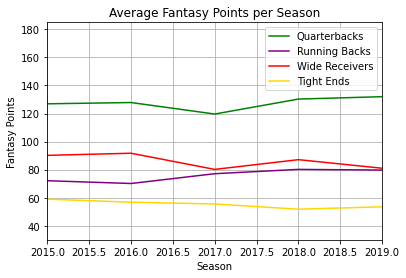

In [27]:
time = np.arange(2015,2020,1).astype(int)
QBs, = plt.plot(time, QB_points, color = "green", label = "Quarterbacks")
RBs, = plt.plot(time, RB_points, color = "purple", label = "Running Backs")
WRs, = plt.plot(time, WR_points, color = "red", label = "Wide Receivers")
TEs, = plt.plot(time, TE_points, color = "gold", label = "Tight Ends")
plt.title("Average Fantasy Points per Season")
plt.xlabel("Season")
plt.ylabel("Fantasy Points")
plt.xlim(2015,2019)
plt.ylim(30,185)
plt.legend(handles=[QBs, RBs, WRs, TEs], loc="upper right")
plt.grid()
plt.show()